<a href="https://colab.research.google.com/github/aansheeagrwal/Deep-Learning/blob/main/Data_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [47]:
import tensorflow as tf

# URL for the flower photos dataset
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

# Re-download and extract the dataset
data_dir = tf.keras.utils.get_file(
    'flower_photos',
    origin=dataset_url,
    cache_dir='/tmp/.keras/datasets',  # The directory where the dataset will be stored
    untar=True  # Automatically extract the dataset
)

print("Dataset downloaded and extracted to:", data_dir)


228813984/228813984 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Dataset downloaded and extracted to: /tmp/.keras/datasets/datasets/flower_photos


In [48]:
import os

# Check the contents of the dataset directory
print("Categories:", os.listdir(data_dir))


Categories: ['flower_photos']


In [50]:
data_dir


'/tmp/.keras/datasets/datasets/flower_photos'

In [51]:
import pathlib
data_dir=pathlib.Path(data_dir)
data_dir


PosixPath('/tmp/.keras/datasets/datasets/flower_photos')

In [52]:
# List all .jpg files in the flower categories subdirectories
jpg_files = list(data_dir.rglob('*.jpg'))

# Print the list of .jpg files
image_count=len(jpg_files)
image_count

3670

In [53]:
roses=list(data_dir.rglob('roses/*'))
roses[:5]


[PosixPath('/tmp/.keras/datasets/datasets/flower_photos/flower_photos/roses/5212885371_fe27c406a2_n.jpg'),
 PosixPath('/tmp/.keras/datasets/datasets/flower_photos/flower_photos/roses/4684127262_6c3346188d.jpg'),
 PosixPath('/tmp/.keras/datasets/datasets/flower_photos/flower_photos/roses/14001990976_bd2da42dbc.jpg'),
 PosixPath('/tmp/.keras/datasets/datasets/flower_photos/flower_photos/roses/14414100710_753a36fce9.jpg'),
 PosixPath('/tmp/.keras/datasets/datasets/flower_photos/flower_photos/roses/15032112248_30c5284e54_n.jpg')]

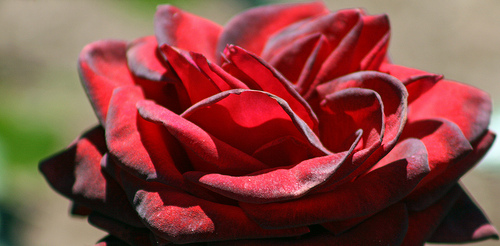

In [54]:
PIL.Image.open(str(roses[1]))


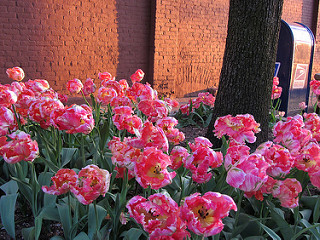

In [55]:
tulips=list(data_dir.rglob('tulips/*'))
PIL.Image.open(str(tulips[1]))


In [56]:
flower_images_dic = {
    'roses': list(data_dir.rglob('roses/*')),
    'daisy': list(data_dir.rglob('daisy/*')),
    'dandelion': list(data_dir.rglob('dandelion/*')),
    'sunflowers': list(data_dir.rglob('sunflowers/*')),
    'tulips': list(data_dir.rglob('tulips/*')),
}


In [57]:
flower_images_dic['roses']


[PosixPath('/tmp/.keras/datasets/datasets/flower_photos/flower_photos/roses/5212885371_fe27c406a2_n.jpg'),
 PosixPath('/tmp/.keras/datasets/datasets/flower_photos/flower_photos/roses/4684127262_6c3346188d.jpg'),
 PosixPath('/tmp/.keras/datasets/datasets/flower_photos/flower_photos/roses/14001990976_bd2da42dbc.jpg'),
 PosixPath('/tmp/.keras/datasets/datasets/flower_photos/flower_photos/roses/14414100710_753a36fce9.jpg'),
 PosixPath('/tmp/.keras/datasets/datasets/flower_photos/flower_photos/roses/15032112248_30c5284e54_n.jpg'),
 PosixPath('/tmp/.keras/datasets/datasets/flower_photos/flower_photos/roses/15750320284_22ef21c682.jpg'),
 PosixPath('/tmp/.keras/datasets/datasets/flower_photos/flower_photos/roses/4921988677_e2eb0c9a24_m.jpg'),
 PosixPath('/tmp/.keras/datasets/datasets/flower_photos/flower_photos/roses/6111589202_8b9555364c_m.jpg'),
 PosixPath('/tmp/.keras/datasets/datasets/flower_photos/flower_photos/roses/7186509956_c37c02fb43_n.jpg'),
 PosixPath('/tmp/.keras/datasets/datasets

In [58]:
flower_labels_dict={
    'roses':0,
    'daisy':1,
    'dandelion':2,
    'sunflowers':3,
    'tulips':4,
}


In [59]:
img = cv2.imread(str(flower_images_dic['roses'][0]))
img.shape


(240, 320, 3)

In [60]:
cv2.resize(img,(180,180)).shape


(180, 180, 3)

In [61]:
x,y=[],[]

for flower_name,images in flower_images_dic.items():
    for image in images:
        img=cv2.imread(str(image))
        resized_img=cv2.resize(img,(180,180))
        x.append(resized_img)
        y.append(flower_labels_dict[flower_name])


In [62]:
x[:5]


[array([[[ 61,  91, 163],
         [ 62,  89, 160],
         [ 61,  85, 157],
         ...,
         [ 14,  97, 173],
         [  8, 113, 176],
         [ 29,  56, 132]],
 
        [[ 60,  87, 156],
         [ 64,  90, 158],
         [ 67,  92, 160],
         ...,
         [  8,  98, 173],
         [ 20, 114, 180],
         [ 19,  43, 120]],
 
        [[ 62,  86, 153],
         [ 64,  89, 154],
         [ 69,  94, 158],
         ...,
         [  2,  95, 170],
         [ 12,  93, 160],
         [ 16,  32, 110]],
 
        ...,
 
        [[  0, 138, 201],
         [  3, 124, 195],
         [  1,  99, 179],
         ...,
         [  5,  49, 165],
         [  8,  52, 169],
         [  7,  54, 170]],
 
        [[  6, 127, 198],
         [  4, 101, 182],
         [  0,  70, 159],
         ...,
         [ 11,  51, 169],
         [ 12,  52, 171],
         [  9,  48, 167]],
 
        [[  3, 105, 185],
         [  1,  70, 161],
         [  2,  62, 158],
         ...,
         [ 15,  49, 172],
  

In [63]:
x=np.array(x)
y=np.array(y)


In [64]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)


In [65]:
len(x_train)


2752

In [66]:
len(x_test)


918

In [67]:
x_train_scaled=x_train/255
x_test_scaled=x_test/255


In [68]:
num_classes=5
model = Sequential([
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

model.compile(optimizer='adam',
               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
               metrics=['accuracy'])

model.fit(x_train_scaled, y_train, epochs=30)

Epoch 1/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 85s 953ms/step - accuracy: 0.2748 - loss: 1.6763
Epoch 2/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 146s 997ms/step - accuracy: 0.5794 - loss: 1.0575
Epoch 3/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 141s 985ms/step - accuracy: 0.6688 - loss: 0.8515
Epoch 4/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 145s 1s/step - accuracy: 0.7306 - loss: 0.6945
Epoch 5/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 139s 993ms/step - accuracy: 0.8254 - loss: 0.4697
Epoch 6/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 85s 981ms/step - accuracy: 0.9137 - loss: 0.2721
Epoch 7/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 85s 988ms/step - accuracy: 0.9444 - loss: 0.1822
Epoch 8/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 139s 963ms/step - accuracy: 0.9728 - loss: 0.1038
Epoch 9/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 142s 965ms/step - accuracy: 0.9842 - loss: 0.0618
Epoch 10/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 143s 974ms/step - accuracy: 0.9943 - loss: 0.0306
Epoch 11/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 142s 969ms/step - accuracy: 0.9835 - loss: 0.0550
Epoch 12/30
86/86 ━━━━━━━━━━━━━━━━━━

In [69]:
model.evaluate(x_train_scaled,y_train)


86/86 ━━━━━━━━━━━━━━━━━━━━ 26s 299ms/step - accuracy: 0.9998 - loss: 6.8432e-04


[0.0007535603945143521, 0.9996366500854492]

In [70]:
model.evaluate(x_test_scaled,y_test)


29/29 ━━━━━━━━━━━━━━━━━━━━ 9s 315ms/step - accuracy: 0.5887 - loss: 3.5748


[3.3578040599823, 0.6056644916534424]

In [71]:
predictions=model.predict(x_test_scaled)
predictions

29/29 ━━━━━━━━━━━━━━━━━━━━ 8s 272ms/step


array([[-14.5548115 ,  14.275362  ,   2.297921  ,  -8.513824  ,
        -11.973782  ],
       [ 14.268726  ,  -3.1708505 , -15.104012  , -18.489096  ,
          5.42104   ],
       [ -2.773968  ,  -1.7720151 ,  22.02005   , -16.983833  ,
         -8.5940075 ],
       ...,
       [  1.6791732 ,   3.5871093 ,  -9.95266   ,   5.7963457 ,
         -6.552067  ],
       [  7.756198  ,  -8.771325  , -11.07126   ,  -7.421434  ,
         11.672854  ],
       [-10.59027   ,   1.1948099 ,   0.30506486,   6.3647428 ,
         -6.0979724 ]], dtype=float32)

In [72]:
score=tf.nn.softmax(predictions[0])
score


<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([3.0144772e-13, 9.9999368e-01, 6.2843565e-06, 1.2670079e-10,
       3.9823466e-12], dtype=float32)>

In [73]:
np.argmax(score)

np.int64(1)

In [74]:
y_test[0]

np.int64(1)

In [75]:
data_augmentation=keras.Sequential([
    layers.RandomZoom(0.1),
    layers.RandomFlip("horizontal",input_shape=(img_height,img_width,3)),
    layers.RandomRotation(0.1),
])

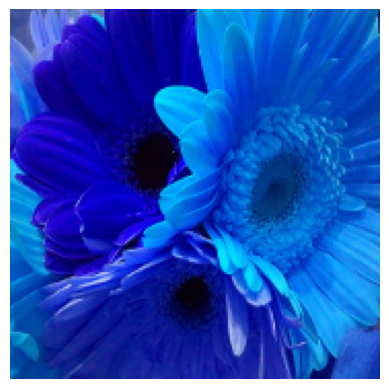

In [76]:
plt.axis('off')
plt.imshow(x[0])

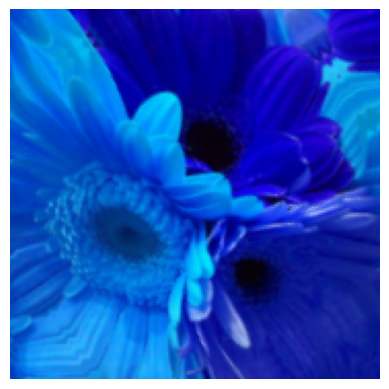

In [77]:
plt.axis('off')
plt.imshow(data_augmentation(x)[0].numpy().astype("uint8"))

In [78]:

num_classes=5
model = Sequential([
    data_augmentation,
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes)
])

model.compile(optimizer='adam',
               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
               metrics=['accuracy'])

model.fit(x_train_scaled, y_train, epochs=30)

Epoch 1/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 106s 1s/step - accuracy: 0.3207 - loss: 1.5793
Epoch 2/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 101s 1s/step - accuracy: 0.5579 - loss: 1.1015
Epoch 3/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 147s 1s/step - accuracy: 0.6337 - loss: 0.9376
Epoch 4/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 138s 1s/step - accuracy: 0.6752 - loss: 0.8522
Epoch 5/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 109s 1s/step - accuracy: 0.6724 - loss: 0.8680
Epoch 6/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 102s 1s/step - accuracy: 0.6888 - loss: 0.7881
Epoch 7/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 140s 1s/step - accuracy: 0.7127 - loss: 0.7233
Epoch 8/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.7279 - loss: 0.7313
Epoch 9/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 143s 1s/step - accuracy: 0.7339 - loss: 0.6995
Epoch 10/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 100s 1s/step - accuracy: 0.7465 - loss: 0.6387
Epoch 11/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 141s 1s/step - accuracy: 0.7660 - loss: 0.6045
Epoch 12/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy:

In [79]:
model.evaluate(x_test_scaled,y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 12s 396ms/step - accuracy: 0.7440 - loss: 0.8395


[0.9255821704864502, 0.7461873888969421]